<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

# Transfer Learning with Keras

* References:

[https://www.hackerearth.com/practice/machine-learning/transfer-learning/transfer-learning-intro/tutorial/](https://www.hackerearth.com/practice/machine-learning/transfer-learning/transfer-learning-intro/tutorial/)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/Transfer%20Learning/Transfer%20Learning%20with%20Keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/Transfer%20Learning/Transfer%20Learning%20with%20Keras.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import numpy as np
from keras.datasets import cifar10

#Load the dataset:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


170500096/170498071 [==============================] - 49s 0us/step


In [2]:
print("There are {} train images and {} test images.".format(X_train.shape[0], X_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


In [0]:
#One-hot encoding the labels
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Shape of each image in the training data:  (32, 32, 3)


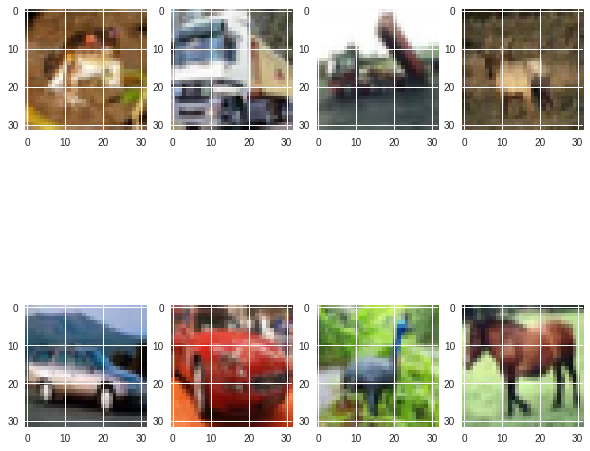

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print('Shape of each image in the training data: ', X_train.shape[1:])

In [5]:
#Importing the necessary libraries 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

#Building up a Sequential model
# Each image in the dataset is of size: 32*32*3
# this applies 32 convolution filters of size 3x3 each -> 32,(3,3)
# our model contains three convolutional layers, each followed by a max pooling layer and 
# finally a Global Average Pooling layer followed by a dense layer with ‘softmax’ as the activation function. 
# There are a total of 29,290 parameters to train.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [0]:
# We will be using ‘binary cross-entropy’ as the loss function, ‘adam’ as the optimizer and ‘accuracy’ as the performance metric.
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Rescaling our data. Rescale is a value by which we will multiply the data such that the resultant values lie in the range (0-1). 
# So, in general, scaling ensures that just because some features are big in magnitude, it doesn’t mean they act as the main features in predicting the label.
X_train_scratch = X_train/255.
X_test_scratch = X_test/255.

In [0]:
#Creating a checkpointer to save the weights of the best model (i.e. the model with minimum loss).
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [9]:
#Fitting the model on the train data and labels.
# We will split the whole training data in batches of 32 and train the model for 10 epochs. 
# We will use be 20 percent of our training data as our validation data. Hence, we will train the model on 10000 samples and validate of 10000 samples.
model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 20s 504us/step - loss: 0.3170 - acc: 0.8997 - val_loss: 0.2444 - val_acc: 0.9060

Epoch 00001: val_loss improved from inf to 0.24436, saving model to scratchmodel.best.hdf5
Epoch 2/10
40000/40000 [==============================] - 19s 475us/step - loss: 0.2276 - acc: 0.9127 - val_loss: 0.2341 - val_acc: 0.9087

Epoch 00002: val_loss improved from 0.24436 to 0.23405, saving model to scratchmodel.best.hdf5
Epoch 3/10
40000/40000 [==============================] - 19s 472us/step - loss: 0.2046 - acc: 0.9206 - val_loss: 0.2055 - val_acc: 0.9211

Epoch 00003: val_loss improved from 0.23405 to 0.20546, saving model to scratchmodel.best.hdf5
Epoch 4/10
40000/40000 [==============================] - 19s 468us/step - loss: 0.1878 - acc: 0.9270 - val_loss: 0.1932 - val_acc: 0.9247

Epoch 00004: val_loss improved from 0.20546 to 0.19322, saving model to scratchmodel.best.hdf5
Epoch 5/10
400

In [10]:
#Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

10000/10000 [==============================] - 2s 163us/step
Accuracy on the Test Images:  0.9355699932098389


## Implement Transfer Learning

In [11]:
#We will be using the Resnet50 model, pre-trained on the ‘Imagenet weights’ to implement transfer learning.

#Importing the ResNet50 model
from keras.applications.resnet50 import ResNet50, preprocess_input

#Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94658560/94653016 [==============================] - 3s 0us/step


# ***# (Not enough memory to execute). Use Jupyter notebook and try again.***

In [0]:
#ResNet50 model is (197 * 197 * 3), we resize our training images to the size (200 * 200 * 3).

from scipy.misc import imresize

#Reshaping the training data
X_train_new = np.array([imresize(X_train[i], (200, 200, 3)) for i in range(0, len(X_train))]).astype('float32')

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
resnet_train_input = preprocess_input(X_train_new)

#Creating bottleneck features for the training data
train_features = model.predict(resnet_train_input)

#Saving the bottleneck features
np.savez('resnet_features_train', features=train_features)

In [0]:
#Reshaping the testing data
X_test_new = np.array([imresize(X_test[i], (200, 200, 3)) for i in range(0, len(X_test))]).astype('float32')

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model.
resnet_test_input = preprocess_input(X_test_new)

#Creating bottleneck features for the testing data
test_features = model.predict(resnet_test_input)

#Saving the bottleneck features
np.savez('resnet_features_test', features=test_features)

In [0]:
#We will use the same process to create bottleneck features for the testing data. 
#Now, that we have created the bottleneck features, we will supply them as input to a sequential model with newly added fully connected layers 
#that match the number of classes in the Cifar-10 dataset.

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [0]:
model.fit(train_features, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

In [0]:
#Evaluate the model on the test data
score  = model.evaluate(test_features, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])